# Data Preparation
<b>1. Data import</b>

In [9]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import data
df = pd.read_csv('bank.txt', sep='\t')
# print data
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2.0,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4.0,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1.0,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3.0,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1.0,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1.0,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1.0,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2.0,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1.0,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


<p><b>2. Data description</b></p>
<p>The data contains 4119 samples and 21 attributes</p>

In [3]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4116.000000,4117.000000,4119.000000,4119.000000,4117.000000,4117.000000,4117.000000,4117.000000,4119.000000
mean,40.162661,256.838678,2.537284,960.422190,0.190337,0.085183,93.579449,-40.502308,3.620728,5166.481695
std,10.621359,254.745327,2.568759,191.922786,0.541788,1.563138,0.579190,4.593059,1.733778,73.667904
min,13.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,140.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<p>We can see the min duration is 0 that highly affects the output target so we need to drop this value</p>
<p>Now we check the values of each column</p>
<p>After checking by hand, we get list of columns need to be correct</p>

In [4]:
error_cols = ['education', 'housing', 'loan', 'contact', 'poutcome']
# check value of education column
df['education'].value_counts()

university.degree      1264
high.school             921
basic.9y                572
professional.course     535
basic.4y                425
basic.6y                223
unknown                 167
basic .6y                 4
basic .9y                 2
basic .4y                 2
basic0.4y                 2
illiterate                1
basic0.6y                 1
Name: education, dtype: int64

<p>Bonus: The job column has some special error values</p>

In [25]:
df['job'].value_counts()

admin.           1010
blue-collar       881
technician        691
services          392
management        324
retired           166
self-employed     158
entrepreneur      147
unemployed        111
housemaid         110
student            82
unknown            39
bluecollar          1
entrepreneurs       1
servicess           1
Name: job, dtype: int64

<p><b>3. Data clean</b></p>
<p>First we need to process the values 0 of duration</p>

In [5]:
df.drop(df[df["duration"]==0].index, inplace=True)

<p>Next we correct the error columns</p>

In [27]:
for col in error_cols:
    df[col] = pd.Series(df[col].str.replace(' ', '').str.replace('0', '').str.lower())
    df.drop(df[df[col]=='na'].index, inplace=True)
df['job'] = pd.Series(df['job'].str.replace('bluecollar', 'blue-collar').str.replace('entrepreneurs', 'entrepreneur').str.replace('servicess', 'services').str.replace('.', ''))

C:\Users\Pc\AppData\Local\Temp\ipykernel_16652\654778936.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['job'] = pd.Series(df['job'].str.replace('bluecollar', 'blue-collar').str.replace('entrepreneurs', 'entrepreneur').str.replace('servicess', 'services').str.replace('.', ''))


<p><b>4. Export clean data to csv</b></p>

In [8]:
df.to_csv('bank.csv', sep=',', index=False)

# Data Exploration
<p><b>1. Step 1</b></p>

In [15]:
df['job'].value_counts()

admin.           1010
blue-collar       881
technician        691
services          392
management        324
retired           166
self-employed     158
entrepreneur      147
unemployed        111
housemaid         110
student            82
unknown            39
bluecollar          1
entrepreneurs       1
servicess           1
Name: job, dtype: int64

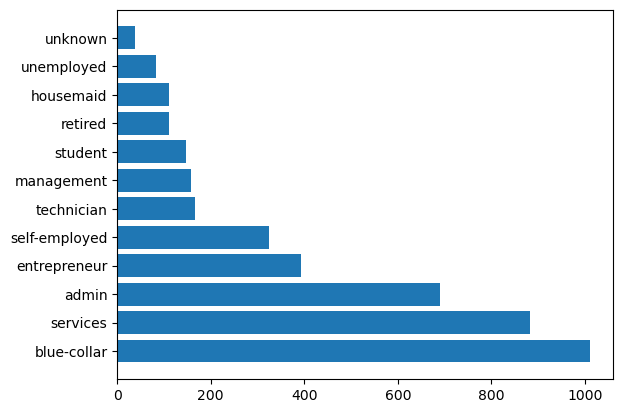

In [31]:
# nominal values
plt.barh(df['job'].unique(), width=df['job'].value_counts())
plt.show()

<p>This graph displays which job has most attended the campaign</p>

<BarContainer object of 8 artists>

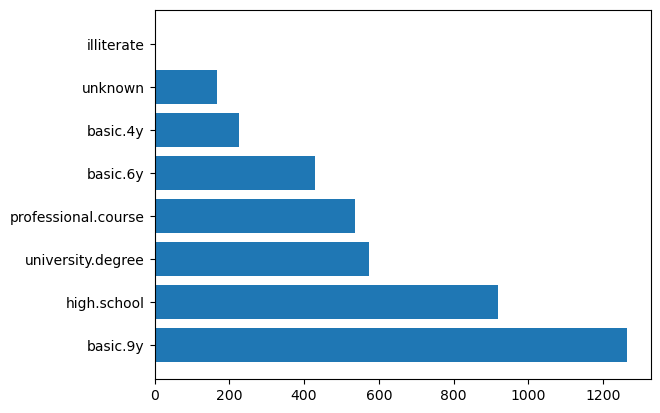

In [32]:
# ordered values
plt.barh(df['education'].unique(), width=df['education'].value_counts())

<p>The graph above displays the most...</p>